In [43]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [44]:
data_path = '../data/' 

# location_path = os.path.join(data_path, 'sdwpf_baidukddcup2022_turb_location.CSV')
# location      = pd.read_csv(location_path)
# location.describe()

data = pd.read_csv(os.path.join(data_path, 'wtbdata_245days.csv')) 
print(data.shape)
print(data.columns)
print(data.isna().sum())
data.head()

(4727520, 13)
Index(['TurbID', 'Day', 'Tmstamp', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'],
      dtype='object')
TurbID         0
Day            0
Tmstamp        0
Wspd       49518
Wdir       49518
Etmp       49518
Itmp       49518
Ndir       49518
Pab1       49518
Pab2       49518
Pab3       49518
Prtv       49518
Patv       49518
dtype: int64


,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [45]:
data.describe()

,TurbID,Day,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
count,4.727520e+06,4.727520e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06
mean,6.750000e+01,1.230000e+02,5.028376e+00,4.975428e-01,4.110668e+01,2.739717e+01,1.885826e+02,2.685400e+01,2.683916e+01,2.682679e+01,-1.323900e+01,3.504458e+02
std,3.868139e+01,7.072483e+01,3.393703e+00,3.160275e+01,8.529011e+01,1.832832e+01,1.632459e+02,3.883566e+01,3.882940e+01,3.882235e+01,7.044244e+01,4.249932e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,-3.030460e+03,-2.730300e+02,-2.731700e+02,-8.848600e+02,-1.000000e+01,-1.000000e+01,-1.000000e+01,-6.249800e+02,-9.330000e+00
25%,3.400000e+01,6.200000e+01,2.240000e+00,-3.830000e+00,1.405000e+01,2.006000e+01,6.302000e+01,1.000000e-02,1.000000e-02,1.000000e-02,-3.861000e+01,-3.000000e-01
50%,6.750000e+01,1.230000e+02,4.340000e+00,-2.300000e-01,2.573000e+01,3.008000e+01,1.947900e+02,5.400000e-01,5.400000e-01,5.400000e-01,-3.000000e-01,1.790800e+02
75%,1.010000e+02,1.840000e+02,7.010000e+00,3.420000e+00,3.273000e+01,3.682000e+01,3.219600e+02,8.399000e+01,8.398000e+01,8.398000e+01,-3.000000e-02,5.476600e+02
max,1.340000e+02,2.450000e+02,2.629000e+01,2.266950e+03,3.943300e+02,3.242100e+02,7.006200e+02,9.998000e+01,9.998000e+01,9.998000e+01,4.852000e+02,1.567020e+03


-10.0 99.98


<Axes: >

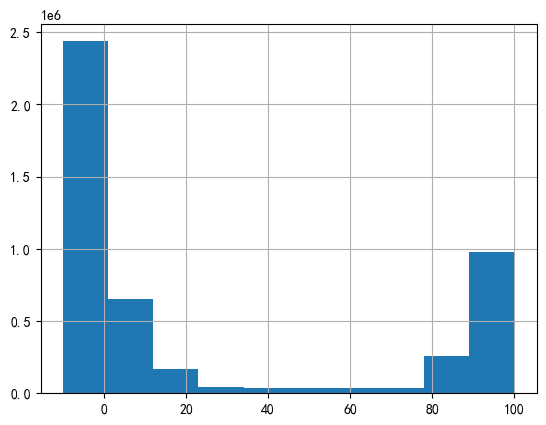

In [46]:
print(data['Pab1'].min(), data['Pab1'].max())
data['Pab1'].hist()

## 1. 缺失值处理
用后一个非控制进行填充

In [47]:
data.groupby('Day')['Patv'].count()

Day
1      19151
2      19280
3      19280
4      19282
5      19281
       ...  
241    19284
242    19270
243    19283
244    19285
245    19283
Name: Patv, Length: 245, dtype: int64

In [48]:
# data = data.fillna(method='bfill')
data['Patv'] = data['Patv'].apply(lambda x: max(0, x))
data['Prtv'] = data['Prtv'].apply(lambda x: max(0, x))

print(data['Patv'].min())
data.isna().sum()

0.0


TurbID         0
Day            0
Tmstamp        0
Wspd       49518
Wdir       49518
Etmp       49518
Itmp       49518
Ndir       49518
Pab1       49518
Pab2       49518
Pab3       49518
Prtv           0
Patv           0
dtype: int64

## 2. 未知值
1. 如果在时刻t，$Patv \leq 0, Wspd > 2.5$，则该时刻的Patv是未知的；
   
2. 如果在时刻t，$Pab1 > 89 | Pab2 > 89 | Pab3 > 89$，Patv未知。



In [49]:
df_unkown1 = data[(data['Patv'] <= 0) & (data['Wspd'] > 2.5)]
df_unkown1.head(20)

unknown_cond1 = (data['Patv'] <= 0) & (data['Wspd'] > 2.5)
unknown_cond2 = (data['Pab1'] > 89) | (data['Pab2'] > 89) | (data['Pab3'] > 89)
print(f"unknown condition1: {sum(unknown_cond1)}, unknown condition2: {sum(unknown_cond2)}")

# data.loc[unknown_cond1, 'Patv'] = float('NaN')
data['Pab1'] = data['Pab1'].clip(upper=89)

# data.fillna(method='linear', inplace=True)

# 未知值和异常值
# invalid_cond = (data['Patv'] < 0) | \
#                 ((data['Patv'] == 0) & (data['Wspd'] > 2.5)) | \
#                 ((data['Pab1'] > 89) | (data['Pab2'] > 89) | (data['Pab3'] > 89)) | \
#                 ((data['Wdir'] < -180) | (data['Wdir'] > 180) | (data['Ndir'] < -720) |
#                 (data['Ndir'] > 720))

# data  = data[~invalid_cond]
# print(data.shape)
# nan_cond = pd.isna(data).any(axis=1)
# invalid_cond = (data['Patv'] < 0) | \
#                 ((data['Patv'] == 0) & (data['Wspd'] > 2.5)) | \
#                 ((data['Pab1'] > 89) | (data['Pab2'] > 89) | (data['Pab3'] > 89)) | \
#                 ((data['Wdir'] < -180) | (data['Wdir'] > 180) | (data['Ndir'] < -720) |
#                 (data['Ndir'] > 720))
# indices = np.where(~nan_cond & ~invalid_cond)

data[unknown_cond1].head(20)

unknown condition1: 299094, unknown condition2: 984595


,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
83,1,1,13:50,5.72,0.08,37.24,48.74,67.22,1.86,1.86,1.86,0.0,0.0
84,1,1,14:00,5.72,-43.83,37.59,49.22,81.45,1.90,1.90,1.90,0.0,0.0
85,1,1,14:10,3.97,-62.36,38.09,49.56,81.45,1.90,1.90,1.90,0.0,0.0
86,1,1,14:20,3.25,-22.98,38.58,49.93,81.45,1.90,1.90,1.90,0.0,0.0
87,1,1,14:30,6.34,-29.70,38.96,50.13,81.45,1.90,1.90,1.90,0.0,0.0
88,1,1,14:40,4.82,-25.09,39.18,50.15,81.45,1.90,1.90,1.90,0.0,0.0
89,1,1,14:50,3.77,-30.20,39.22,50.17,81.45,1.90,1.90,1.90,0.0,0.0
90,1,1,15:00,5.83,-42.78,39.33,50.18,81.45,1.90,1.90,1.90,0.0,0.0
93,1,1,15:30,4.82,-40.94,31.92,39.99,81.45,1.88,1.88,1.88,0.0,0.0
94,1,1,15:40,2.69,-25.19,-13.29,-6.92,81.45,1.75,1.75,1.75,0.0,0.0


## 2. 删除线性相关性高的变量

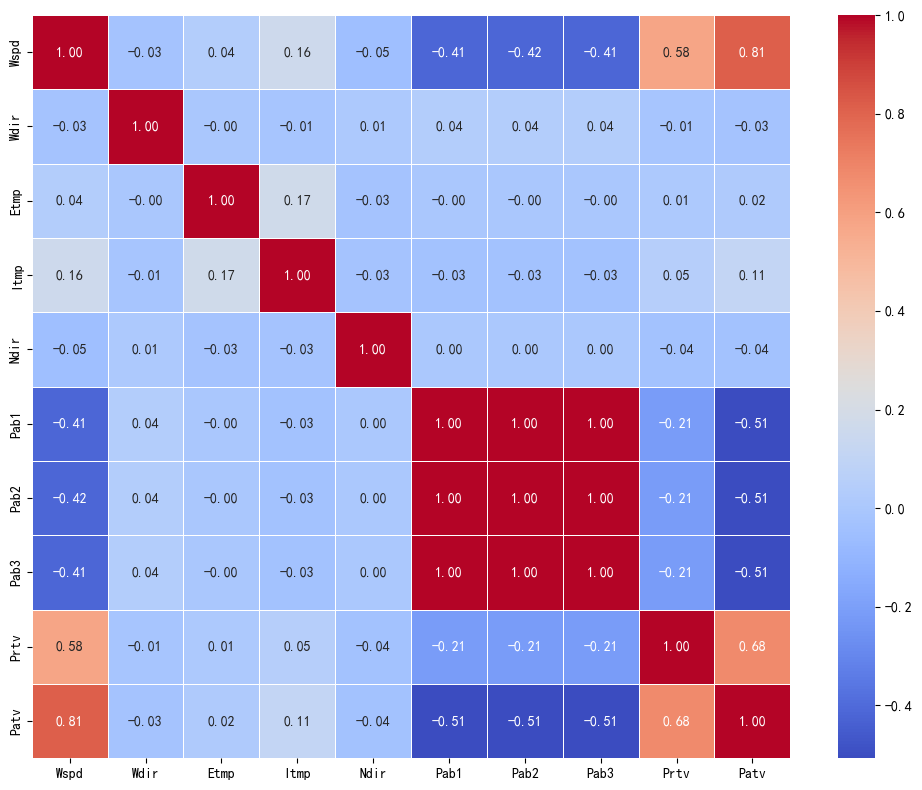

In [51]:
# 计算特征之间的相关系数
df = data[['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']]
correlation_matrix = df.corr()

# 绘制热力图
plt.figure(figsize=(10, 8), facecolor='w')
plt.rcParams['font.sans-serif'] = ['SimHei'] # 黑体
plt.rcParams['axes.unicode_minus'] = False   # 解决无法显示符号的问题
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('特征相关系数热力图')
plt.tight_layout()
# plt.savefig('特征相关系数热力图.png', dpi=300)
# plt.savefig('特征相关系数热力图.svg', dpi=300)
plt.show()

In [50]:
data['Pab1-Pab2'] = data['Pab1'] - data['Pab2']
data['Pab1-Pab3'] = data['Pab1'] - data['Pab3']
data['Pab2-Pab3'] = data['Pab2'] - data['Pab3']

print(len(data))
data[['Pab1-Pab2', 'Pab1-Pab3', 'Pab2-Pab3']].sum()

4727520


Pab1-Pab2   -1144199.31
Pab1-Pab3   -1086319.72
Pab2-Pab3      57879.59
dtype: float64

In [10]:
cols_use = ['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Prtv', 'Patv']

data = data[cols_use]
print(data.shape, data.columns)
data.head(7)

(4727520, 8) Index(['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Prtv', 'Patv'], dtype='object')


,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Prtv,Patv
0,6.17,-3.99,30.73,41.80,25.92,1.0,-0.25,494.66
1,6.17,-3.99,30.73,41.80,25.92,1.0,-0.25,494.66
2,6.27,-2.18,30.60,41.63,20.91,1.0,-0.24,509.76
3,6.42,-0.73,30.52,41.52,20.91,1.0,-0.26,542.53
4,6.25,0.89,30.49,41.38,20.91,1.0,-0.23,509.36
5,6.10,-1.03,30.47,41.22,20.91,1.0,-0.27,482.21
6,6.77,1.07,30.31,41.19,20.91,1.0,-0.23,584.75


## 3. 异常值处理
判定规则：
1. $Ndir \in [-720, 720]$, 不在这个范围的时刻的Patv为异常值；
2. $Wdir \in [-180, 180]$，不在这个范围的时刻的Patv为异常值；
3. Patv和Prtv应该都大于0；


In [55]:
data['Ndir'] = data['Ndir'].clip(lower=-720, upper=720)
data['Wdir'] = data['Wdir'].clip(lower=-180, upper=180)

data.interpolate(method='linear', inplace=True)
data.fillna(method='bfill', inplace=True)
data = data[cols_use]
print(data.shape, data.columns)
print(data.isna().sum())
data.head(20)

C:\Users\LLiiH\AppData\Local\Temp\ipykernel_16884\76240720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ndir'] = data['Ndir'].clip(lower=-720, upper=720)
C:\Users\LLiiH\AppData\Local\Temp\ipykernel_16884\76240720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wdir'] = data['Wdir'].clip(lower=-180, upper=180)


(4727520, 8) Index(['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Prtv', 'Patv'], dtype='object')
Wspd    0
Wdir    0
Etmp    0
Itmp    0
Ndir    0
Pab1    0
Prtv    0
Patv    0
dtype: int64


C:\Users\LLiiH\AppData\Local\Temp\ipykernel_16884\76240720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.interpolate(method='linear', inplace=True)
C:\Users\LLiiH\AppData\Local\Temp\ipykernel_16884\76240720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(method='bfill', inplace=True)


,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Prtv,Patv
0,6.17,-3.99,30.73,41.80,25.92,1.0,0.0,0.00
1,6.17,-3.99,30.73,41.80,25.92,1.0,0.0,494.66
2,6.27,-2.18,30.60,41.63,20.91,1.0,0.0,509.76
3,6.42,-0.73,30.52,41.52,20.91,1.0,0.0,542.53
4,6.25,0.89,30.49,41.38,20.91,1.0,0.0,509.36
5,6.10,-1.03,30.47,41.22,20.91,1.0,0.0,482.21
6,6.77,1.07,30.31,41.19,20.91,1.0,0.0,584.75
7,6.70,-2.80,30.24,41.00,20.91,1.0,0.0,557.98
8,6.44,-3.46,30.13,40.91,20.91,1.0,0.0,503.94
9,6.25,-3.15,29.97,40.72,20.91,1.0,0.0,463.37
